In [499]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import pickle

In [500]:
df=pd.read_csv('test.csv')

In [501]:
df.shape

(50000, 27)

In [502]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [503]:
df.dropna(inplace=True)

In [504]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    9757
Good        5802
Bad         5654
_           5246
Name: count, dtype: int64

In [505]:
df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan'],inplace=True) # removing useless columns

In [506]:
df['Age']=df['Age'].str.strip('_') # stripping '-' character

In [507]:
df['Age']=df['Age'].astype(float) # converting data type float

In [508]:
df=df[df['Occupation']!='_______'] # removing the values '_______' from the occupation column

In [509]:
df['Annual_Income']=df['Annual_Income'].str.strip('_') # stripping '-' character

In [510]:
df['Annual_Income']=df['Annual_Income'].astype(float) # converting datatype

In [511]:
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].astype(float) # converting datatype

In [512]:
df['Num_of_Loan']=df['Num_of_Loan'].str.strip('_') # stripping '-' character

In [513]:
df['Num_of_Loan']=df['Num_of_Loan'].astype(float) # converting datatype

In [514]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.strip('_') # stripping '-' character

In [515]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float) # converting datatype

In [516]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.strip('_') # stripping '-' character

In [517]:
df=df[df['Changed_Credit_Limit']!=''] # removing blank space from the column 

In [518]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float) # converting datatype

In [519]:
df=df[df['Credit_Mix']!='_'] # removing '-' character from the columns

In [520]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.strip('_') # stripping '-' character

In [521]:
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float) # converting datatype

In [522]:
df=df[df['Payment_of_Min_Amount']!='NM'] # removing irrelavant character from the columns since it is a boolean column

In [523]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.strip('_') # stripping '-' character

In [524]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float) # converting datatype

In [525]:
df['Monthly_Balance']=df['Monthly_Balance'].str.strip('_') # stripping '-' character

In [526]:
df['Monthly_Balance']=df['Monthly_Balance'].astype(float) # converting datatype

IQR Method

In [527]:
iqr_dict={}
for i in df:
  if df[i].dtype in [int,float]:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    min_range=q1-(1.5*iqr)
    max_range=q3+(1.5*iqr)
    iqr_dict[i]=(min_range,max_range)
iqr_dict

{'Age': (np.float64(-0.5), np.float64(67.5)),
 'Annual_Income': (np.float64(-57754.87750000001), np.float64(146458.9425)),
 'Monthly_Inhand_Salary': (np.float64(-4620.501249999998),
  np.float64(11893.535416666664)),
 'Num_Bank_Accounts': (np.float64(-2.0), np.float64(14.0)),
 'Num_Credit_Card': (np.float64(-0.5), np.float64(11.5)),
 'Interest_Rate': (np.float64(-13.0), np.float64(43.0)),
 'Num_of_Loan': (np.float64(-4.0), np.float64(12.0)),
 'Delay_from_due_date': (np.float64(-16.0), np.float64(56.0)),
 'Num_of_Delayed_Payment': (np.float64(-6.0), np.float64(34.0)),
 'Changed_Credit_Limit': (np.float64(-9.28), np.float64(30.08)),
 'Num_Credit_Inquiries': (np.float64(-4.0), np.float64(20.0)),
 'Outstanding_Debt': (np.float64(-1669.1175000000003), np.float64(4394.5825)),
 'Credit_Utilization_Ratio': (np.float64(15.468079372165995),
  np.float64(48.89557197052333)),
 'Total_EMI_per_month': (np.float64(-165.3502450625721),
  np.float64(390.0444805438806)),
 'Amount_invested_monthly': (np.

In [528]:
df.shape

(16975, 22)

In [529]:
df[df['Age']<100]['Age'].max()

np.float64(95.0)

In [530]:
df=df[(df['Age']>0) & (df['Age']<100)] # there are ages which are negative and greater than 100 

In [531]:
df.shape

(16460, 22)

In [532]:
df=df[(df['Num_Bank_Accounts']>0) & (df['Num_Bank_Accounts']<11)] # filtering out the relevant values 

In [533]:
df=df[(df['Num_Credit_Card']>0) & (df['Num_Credit_Card']<11)] # filtering out the relevant values

In [534]:
df=df[(df['Interest_Rate']>0) & (df['Interest_Rate']<=iqr_dict['Interest_Rate'][1])] # filtering out the relevant values using iqr method

In [535]:
df=df[(df['Num_of_Loan']>0) & (df['Num_of_Loan']<=12)] # filtering out the relevant values

In [536]:
df=df[df['Delay_from_due_date']>0] # filtering out the relevant values

In [537]:
df=df[(df['Num_of_Delayed_Payment']>=0) & (df['Num_of_Delayed_Payment']<=34)] # filtering out the relevant values

In [538]:
df=df[(df['Num_Credit_Inquiries']>0) & (df['Num_Credit_Inquiries']<=20)] # filtering out the relevant values

In [539]:
# df['Outstanding_Debt'] is in US dollars
df=df[df['Outstanding_Debt']>12] # filtering out the relevant values

In [540]:
df['Credit_History_Age'].unique()

array(['22 Years and 10 Months', '27 Years and 4 Months',
       '18 Years and 6 Months', '17 Years and 11 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '19 Years and 10 Months', '27 Years and 6 Months',
       '27 Years and 7 Months', '18 Years and 11 Months',
       '19 Years and 1 Months', '18 Years and 10 Months',
       '19 Years and 0 Months', '10 Years and 9 Months',
       '10 Years and 10 Months', '11 Years and 0 Months',
       '12 Years and 11 Months', '18 Years and 8 Months',
       '18 Years and 9 Months', '14 Years and 4 Months',
       '14 Years and 6 Months', '14 Years and 7 Months',
       '20 Years and 0 Months', '20 Years and 1 Months',
       '30 Years and 11 Months', '31 Years and 2 Months',
       '19 Years and 7 Months', '9 Years and 4 Months',
       '9 Years and 5 Months', '13 Years and 9 Months',
       '13 Years and 11 Months', '22 Years and 2 Months',
       '28 Years and 10 

In [541]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: (int(re.search(r'(\d+)\s*[yY]ears?', x).group(1)) * 12) + int(re.search(r'(\d+)\s*[nM]onths?',x).group(1)))

In [542]:
df.rename({'Credit_History_Age':'Credit_History_Age(in months)'},inplace=True) # for better understanding renaming the column name

In [543]:
df['Total_EMI_per_month'] # in US Dollars

1         49.574949
5         18.816215
9        246.992319
12        16.415452
14        16.415452
            ...    
49966     28.182033
49976    362.072453
49992     60.964772
49993     60.964772
49997     35.104023
Name: Total_EMI_per_month, Length: 13318, dtype: float64

In [544]:
df=df[df['Total_EMI_per_month']>12]  # filtering out the relevant values

In [545]:
df=df[df['Payment_Behaviour']!='!@9#%8'] # removing the irrelevant values

In [546]:
df[df['Monthly_Balance']<0]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
17036,September,38.0,Media_Manager,29588.18,2281.681667,3,4,1,3.0,9,7.0,2.73,3.0,Good,193.06,28.385089,247,No,61.709502,70.725651,High_spent_Small_value_payments,-3.333333e+26


In [547]:
df=df[df['Monthly_Balance']>0] # removing negative values

In [548]:
df1=df.copy()

In [549]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

ANALYSIS


In [550]:
df1['Credit_Mix'].value_counts()

Credit_Mix
Standard    5790
Bad         3548
Good        2723
Name: count, dtype: int64

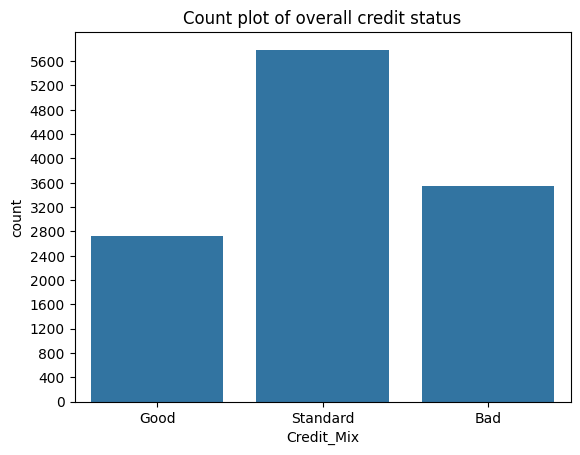

In [551]:
sns.countplot(x=df1['Credit_Mix'])
plt.title('Count plot of overall credit status')
plt.yticks(range(0,6000,400))
plt.show()

In [552]:
z=df1.groupby('Credit_Mix')[['Outstanding_Debt']].mean().sort_values(by='Outstanding_Debt')
z

,Outstanding_Debt
Credit_Mix,
Good,743.040342
Standard,1125.145212
Bad,2988.870896


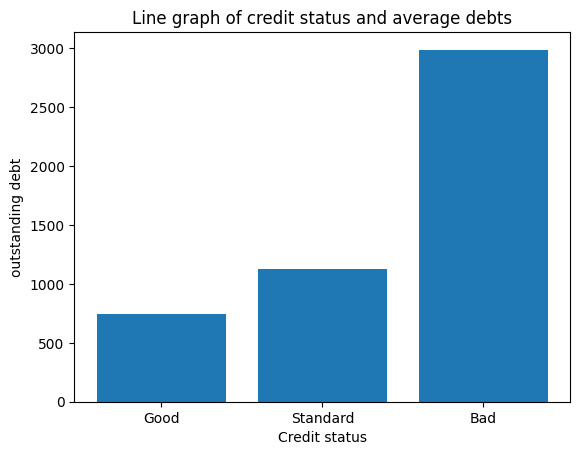

In [553]:
plt.bar(z.index,z['Outstanding_Debt'])
plt.xlabel('Credit status')
plt.ylabel('outstanding debt')
plt.title('Line graph of credit status and average debts')
plt.show()

In [554]:
z=df1.groupby(['Credit_Mix'])['Interest_Rate'].mean().sort_values()
z

Credit_Mix
Good         6.399559
Standard    15.145769
Bad         24.396561
Name: Interest_Rate, dtype: float64

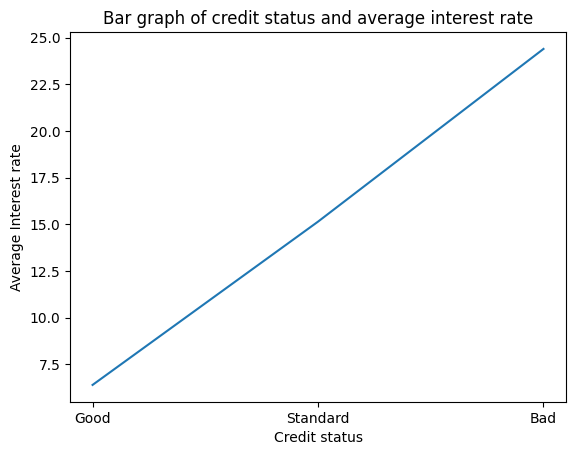

In [555]:
plt.plot(z)
plt.xlabel('Credit status')
plt.ylabel('Average Interest rate')
plt.title('Bar graph of credit status and average interest rate')
plt.show()

In [556]:
z=df1.groupby('Credit_Mix')['Monthly_Inhand_Salary'].mean().sort_values()
z

Credit_Mix
Bad         2675.903011
Standard    3901.471954
Good        5707.602086
Name: Monthly_Inhand_Salary, dtype: float64

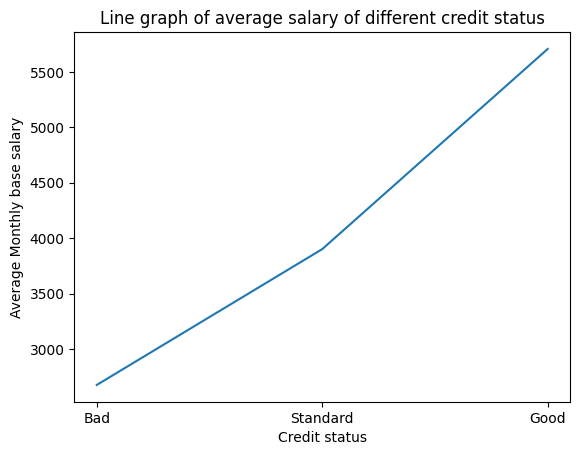

In [557]:
plt.plot(z)
plt.xlabel('Credit status')
plt.ylabel('Average Monthly base salary')
plt.title('Line graph of average salary of different credit status')
plt.show()

In [558]:
z=df1.groupby(['Credit_Mix'])['Num_of_Loan'].sum().sort_values()
z

Credit_Mix
Good         6927.0
Standard    20630.0
Bad         22559.0
Name: Num_of_Loan, dtype: float64

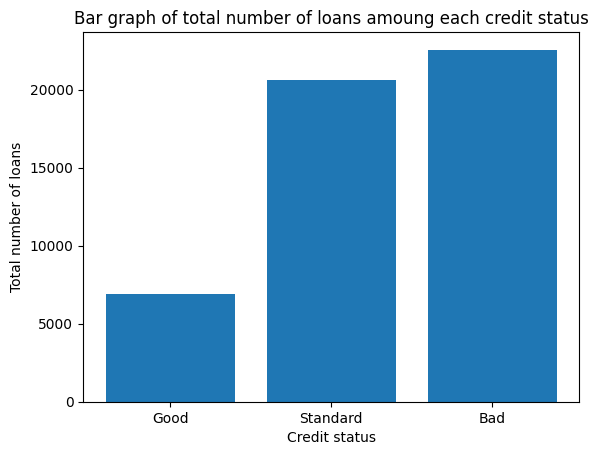

In [559]:
plt.bar(z.index,z)
plt.xlabel("Credit status")
plt.ylabel('Total number of loans')
plt.title("Bar graph of total number of loans amoung each credit status")
plt.show()

In [560]:
z=df1.groupby(['Credit_Mix'])['Delay_from_due_date'].mean().sort_values()
z

Credit_Mix
Good        10.754315
Standard    19.727979
Bad         38.373168
Name: Delay_from_due_date, dtype: float64

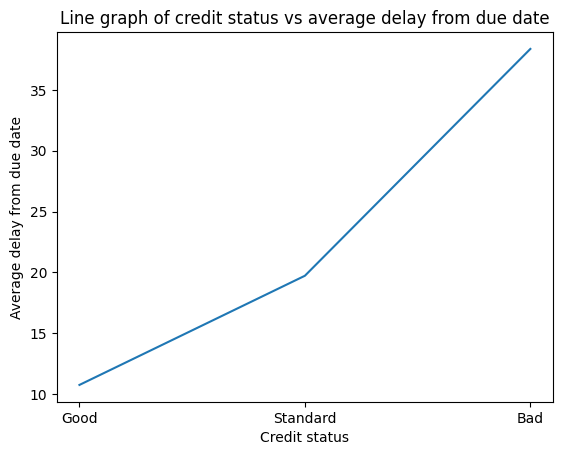

In [561]:
plt.plot(z)
plt.xlabel('Credit status')
plt.ylabel('Average delay from due date')
plt.title('Line graph of credit status vs average delay from due date')
plt.show()

In [562]:
df1.groupby(['Payment_of_Min_Amount','Credit_Mix'])[['Credit_Mix']].count()

Credit_Mix
Payment_of_Min_Amount Credit_Mix            
No                    Good              2723
                      Standard          1099
Yes                   Bad               3548
                      Standard          4691

In [563]:
z=df1.groupby('Credit_Mix')[['Monthly_Balance']].mean().sort_values(by='Monthly_Balance',ascending=False)
z

,Monthly_Balance
Credit_Mix,
Good,488.652959
Standard,381.204095
Bad,280.772860


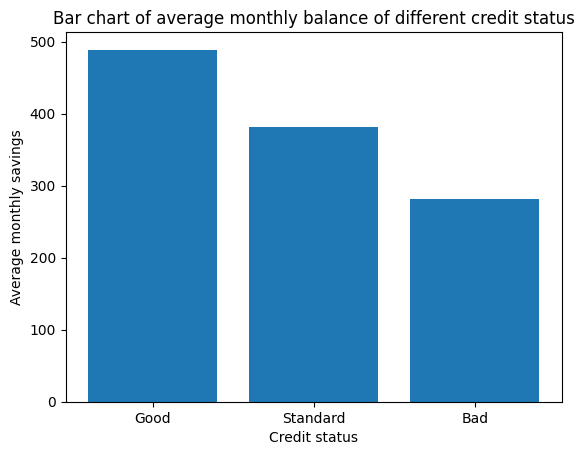

In [564]:
plt.bar(z.index,z['Monthly_Balance'])
plt.title('Bar chart of average monthly balance of different credit status')
plt.xlabel('Credit status')
plt.ylabel('Average monthly savings')
plt.show()

In [565]:
z=df1.groupby('Credit_Mix')['Changed_Credit_Limit'].mean().sort_values(ascending=False)
z
# Changed_Credit_Limit => Represents the percentage change in credit card limit

Credit_Mix
Bad         13.877647
Standard    11.636473
Good         6.119423
Name: Changed_Credit_Limit, dtype: float64

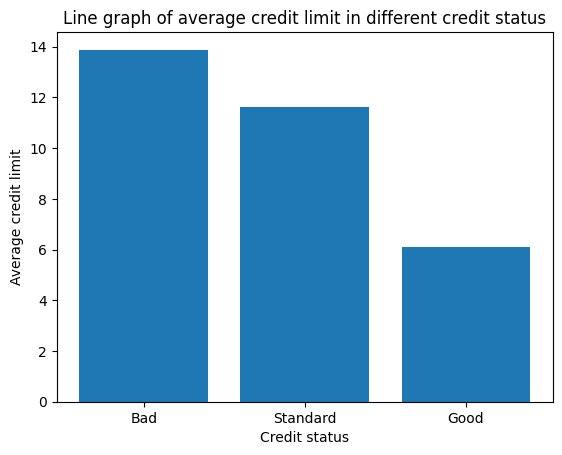

In [566]:
plt.bar(z.index,z)
plt.xlabel('Credit status')
plt.ylabel('Average credit limit')
plt.title('Line graph of average credit limit in different credit status')
plt.show()
# insight -> bad credit status tries to improve their credit score

In [567]:
df1.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [568]:
df1.groupby(['Credit_Mix','Month'])[['Month']].count()

Month
Credit_Mix Month           
Bad        December     849
           November     921
           October      867
           September    911
Good       December     709
           November     685
           October      662
           September    667
Standard   December    1486
           November    1458
           October     1407
           September   1439

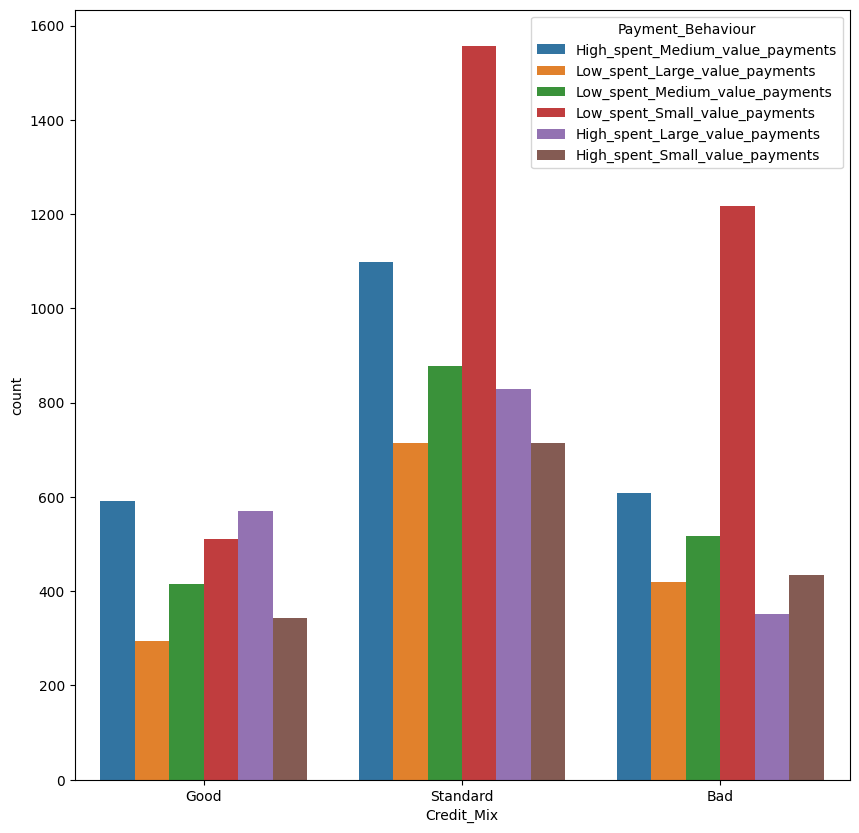

In [569]:
plt.figure(figsize=(10,10))
sns.countplot(x=df1['Credit_Mix'],hue=df1['Payment_Behaviour'])
plt.show()

In [570]:
df1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
1,October,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,9.0,13.27,4.0,Good,809.98,33.053114,274,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
5,October,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,3.0,5.42,5.0,Good,605.03,30.116600,328,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
9,October,35.0,Engineer,143162.64,12187.220000,1,5,8,3.0,6,3.0,2.10,3.0,Good,1303.01,35.685836,222,No,246.992319,453.615131,Low_spent_Large_value_payments,788.114550
12,September,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,5,6.0,1.99,4.0,Good,632.46,39.377219,215,No,16.415452,69.107006,High_spent_Medium_value_payments,425.726626
14,November,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,5,6.0,1.99,4.0,Good,632.46,36.824468,217,No,16.415452,191.886244,Low_spent_Medium_value_payments,332.947388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49966,November,39.0,Manager,15319.65,1460.637500,6,7,15,4.0,53,16.0,17.13,6.0,Bad,1453.61,25.497671,139,Yes,28.182033,28.514703,High_spent_Large_value_payments,329.367014
49976,September,21.0,Architect,38321.39,3106.647859,4,4,3,4.0,11,7.0,1.59,6.0,Good,678.57,29.004432,211,No,362.072453,79.991128,High_spent_Large_value_payments,381.182642
49992,September,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,18.31,9.0,Bad,3571.70,32.391288,76,Yes,60.964772,107.210742,Low_spent_Small_value_payments,314.815153
49993,October,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,18.31,12.0,Bad,3571.70,37.528511,77,Yes,60.964772,71.794421,Low_spent_Small_value_payments,350.231473


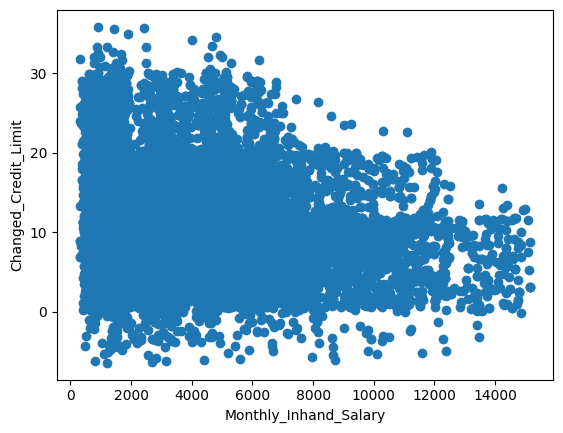

In [571]:
plt.scatter(df1['Monthly_Inhand_Salary'],df1['Changed_Credit_Limit'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Changed_Credit_Limit')
plt.show()
# when salary increases, credit limit change is lowered, implies that the number of loans also increases and making debts  

Ordinal Encoding for month

In [572]:
month=OrdinalEncoder(categories=[['September', 'October', 'November', 'December']])
df['Month']=month.fit_transform(df[['Month']])

Ordinal encoding for occupation

In [573]:
occupation=LabelEncoder()
df['Occupation']=occupation.fit_transform(df['Occupation'])

Ordinal Encoding in credit_mix

In [574]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [575]:
credit_mix=OrdinalEncoder(categories=[['Bad','Standard','Good']])
df['Credit_Mix']=credit_mix.fit_transform(df[['Credit_Mix']])

Ordinal encoding in Payment_Behaviour

In [576]:
df['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [577]:
behavior=OrdinalEncoder(categories=[['Low_spent_Small_value_payments','Low_spent_Medium_value_payments','Low_spent_Large_value_payments','High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments']])
df['Payment_Behaviour']=behavior.fit_transform(df[['Payment_Behaviour']])

In [578]:
Payment_of_Min_Amount=LabelEncoder()
df['Payment_of_Min_Amount']=Payment_of_Min_Amount.fit_transform(df['Payment_of_Min_Amount'])

In [579]:
df['Interest_Rate'].dtype

dtype('int64')

Checking for negative or any outliers

In [580]:
for i in df:
  if df[i].dtype in [int,float]:
    print(f"Minimum value of {i}:",df[i].min())
    print(f'Maximum_value of {i}:',df[i].max())
    print()

Minimum value of Month: 0.0
Maximum_value of Month: 3.0

Minimum value of Age: 14.0
Maximum_value of Age: 95.0

Minimum value of Occupation: 0
Maximum_value of Occupation: 14

Minimum value of Annual_Income: 7005.93
Maximum_value of Annual_Income: 23994243.0

Minimum value of Monthly_Inhand_Salary: 303.6454166666666
Maximum_value of Monthly_Inhand_Salary: 15167.18

Minimum value of Num_Bank_Accounts: 1
Maximum_value of Num_Bank_Accounts: 10

Minimum value of Num_Credit_Card: 1
Maximum_value of Num_Credit_Card: 10

Minimum value of Interest_Rate: 1
Maximum_value of Interest_Rate: 34

Minimum value of Num_of_Loan: 1.0
Maximum_value of Num_of_Loan: 9.0

Minimum value of Delay_from_due_date: 1
Maximum_value of Delay_from_due_date: 67

Minimum value of Num_of_Delayed_Payment: 0.0
Maximum_value of Num_of_Delayed_Payment: 28.0

Minimum value of Changed_Credit_Limit: -6.4
Maximum_value of Changed_Credit_Limit: 35.81

Minimum value of Num_Credit_Inquiries: 1.0
Maximum_value of Num_Credit_Inquir

In [581]:
df.drop(index=df[df['Age']==95].index,inplace=True) 

In [582]:
corr=df.corr(numeric_only=True)['Credit_Mix'].abs().sort_values()
corr=corr.tail(11)

In [583]:
corr

Num_Credit_Card           0.537051
Num_of_Loan               0.634482
Num_Credit_Inquiries      0.638348
Credit_History_Age        0.646660
Delay_from_due_date       0.668915
Outstanding_Debt          0.697495
Num_Bank_Accounts         0.699354
Interest_Rate             0.728803
Payment_of_Min_Amount     0.740903
Num_of_Delayed_Payment    0.750637
Credit_Mix                1.000000
Name: Credit_Mix, dtype: float64

In [584]:
df2=df[corr.index]
df2

,Num_Credit_Card,Num_of_Loan,Num_Credit_Inquiries,Credit_History_Age,Delay_from_due_date,Outstanding_Debt,Num_Bank_Accounts,Interest_Rate,Payment_of_Min_Amount,Num_of_Delayed_Payment,Credit_Mix
1,4,4.0,4.0,274,3,809.98,3,3,0,9.0,2.0
5,4,1.0,5.0,328,3,605.03,2,6,0,3.0,2.0
9,5,3.0,3.0,222,6,1303.01,1,8,0,3.0,2.0
12,5,1.0,4.0,215,5,632.46,2,4,0,6.0,2.0
14,5,1.0,4.0,217,5,632.46,2,4,0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
49966,7,4.0,6.0,139,53,1453.61,6,15,1,16.0,0.0
49976,4,4.0,6.0,211,11,678.57,4,3,0,7.0,2.0
49992,8,5.0,9.0,76,33,3571.70,10,29,1,25.0,0.0
49993,8,5.0,12.0,77,33,3571.70,10,29,1,25.0,0.0


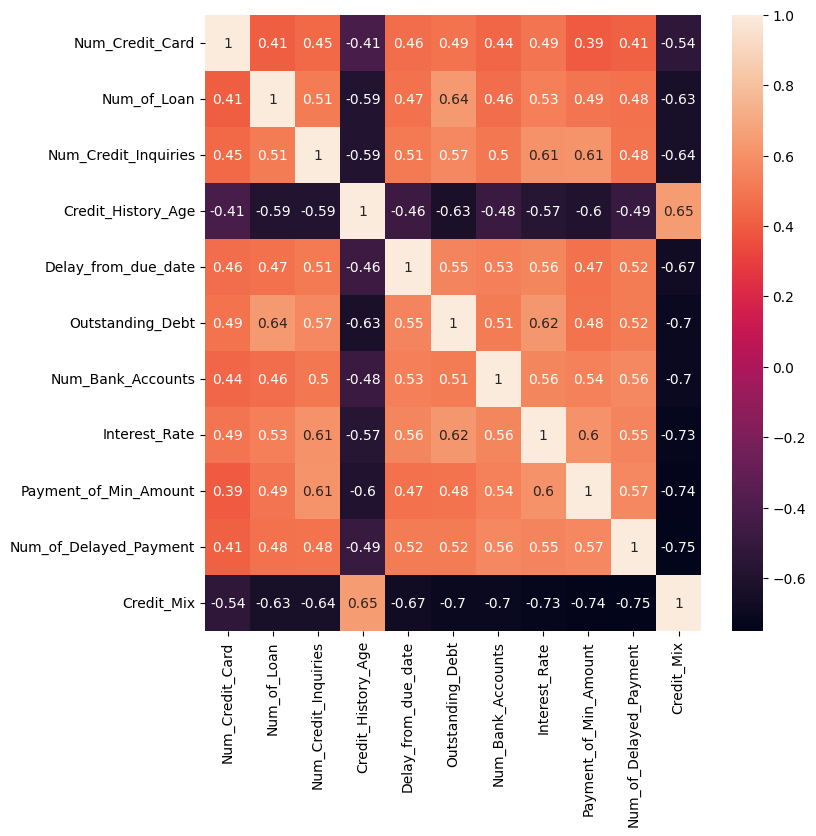

In [585]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(numeric_only=True),annot=True)
plt.show()

Modeling

In [586]:
x=df.drop(columns=['Credit_Mix'])
y=df['Credit_Mix']

In [587]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

In [588]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [589]:
models=[KNeighborsClassifier(),SVC(),MultinomialNB(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),AdaBoostClassifier(random_state=42),XGBClassifier(random_state=42)]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'Accuracy score of train data-{str(model).split('(')[0]}:',model.score(x_train,y_train)*100)
  print(f'Accuracy score of test data-{str(model).split('(')[0]}:',accuracy_score(y_test,y_pred)*100)
  print()

Accuracy score of train data-KNeighborsClassifier: 93.44941956882255
Accuracy score of test data-KNeighborsClassifier: 90.74074074074075

Accuracy score of train data-SVC: 93.98246860933428
Accuracy score of test data-SVC: 92.92426755113323

Accuracy score of train data-MultinomialNB: 80.6562425965411
Accuracy score of test data-MultinomialNB: 81.53676064123825

Accuracy score of train data-DecisionTreeClassifier: 100.0
Accuracy score of test data-DecisionTreeClassifier: 93.06246545052515

Accuracy score of train data-RandomForestClassifier: 100.0
Accuracy score of test data-RandomForestClassifier: 95.6882255389718

Accuracy score of train data-GradientBoostingClassifier: 96.12651030561479
Accuracy score of test data-GradientBoostingClassifier: 94.47208402432284

Accuracy score of train data-AdaBoostClassifier: 84.9680170575693
Accuracy score of test data-AdaBoostClassifier: 84.5771144278607

Accuracy score of train data-XGBClassifier: 100.0
Accuracy score of test data-XGBClassifier: 9

feature selection using wrapper selection method

In [590]:
x=df.drop(columns='Credit_Mix')
y=df['Credit_Mix']

In [591]:
model=RandomForestClassifier(random_state=42)
rfe=RFE(model,n_features_to_select=10)
rfe.fit(x,y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [592]:
rfe.get_support()

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False])

In [593]:
x.columns[rfe.get_support()]

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount'],
      dtype='object')

In [594]:
x=df[x.columns[rfe.get_support()]]

In [595]:
# bad -0
# standard -1
# good -2

# no -0
# yes -1

In [596]:
z=x.copy()
z['credit_mix']=y


In [597]:
z[(z['credit_mix']==2)]

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,credit_mix
1,3,4,3,4.0,3,9.0,13.27,809.98,274,0,2.0
5,2,4,6,1.0,3,3.0,5.42,605.03,328,0,2.0
9,1,5,8,3.0,6,3.0,2.10,1303.01,222,0,2.0
12,2,5,4,1.0,5,6.0,1.99,632.46,215,0,2.0
14,2,5,4,1.0,5,6.0,1.99,632.46,217,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
49951,2,3,7,1.0,2,10.0,13.66,1245.01,290,0,2.0
49956,8,5,12,4.0,25,11.0,2.97,909.01,203,0,2.0
49957,8,5,12,4.0,25,14.0,2.97,909.01,204,0,2.0
49976,4,4,3,4.0,11,7.0,1.59,678.57,211,0,2.0


In [598]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

In [599]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [611]:
from sklearn.metrics import classification_report
models=[KNeighborsClassifier(),SVC(),MultinomialNB(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),AdaBoostClassifier(random_state=42),XGBClassifier(random_state=42)]
dict_models={}
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'Accuracy score of test data-{str(model).split('(')[0]}:',accuracy_score(y_test,y_pred)*100)
  print("classification_report\n",classification_report(y_test,y_pred))
  print()
  dict_models[str(model).split('(')[0]]=accuracy_score(y_test,y_pred)*100
dict_models

Accuracy score of test data-KNeighborsClassifier: 93.20066334991708
classification_report
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1033
         1.0       0.95      0.91      0.93      1796
         2.0       0.90      0.94      0.92       789

    accuracy                           0.93      3618
   macro avg       0.93      0.94      0.93      3618
weighted avg       0.93      0.93      0.93      3618


Accuracy score of test data-SVC: 93.31122166943062
classification_report
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1033
         1.0       0.95      0.92      0.93      1796
         2.0       0.91      0.93      0.92       789

    accuracy                           0.93      3618
   macro avg       0.93      0.94      0.93      3618
weighted avg       0.93      0.93      0.93      3618


Accuracy score of test data-MultinomialNB: 70.37037037037037
classifica

{'KNeighborsClassifier': 93.20066334991708,
 'SVC': 93.31122166943062,
 'MultinomialNB': 70.37037037037037,
 'DecisionTreeClassifier': 93.69817578772802,
 'RandomForestClassifier': 96.43449419568823,
 'GradientBoostingClassifier': 94.58264234383637,
 'AdaBoostClassifier': 84.5771144278607,
 'XGBClassifier': 96.26865671641791}

In [601]:
dict_models=dict(sorted(dict_models.items(),key=lambda x:x[1]))
dict_models

{'MultinomialNB': 70.37037037037037,
 'AdaBoostClassifier': 84.5771144278607,
 'KNeighborsClassifier': 93.20066334991708,
 'SVC': 93.31122166943062,
 'DecisionTreeClassifier': 93.69817578772802,
 'GradientBoostingClassifier': 94.58264234383637,
 'XGBClassifier': 96.26865671641791,
 'RandomForestClassifier': 96.43449419568823}

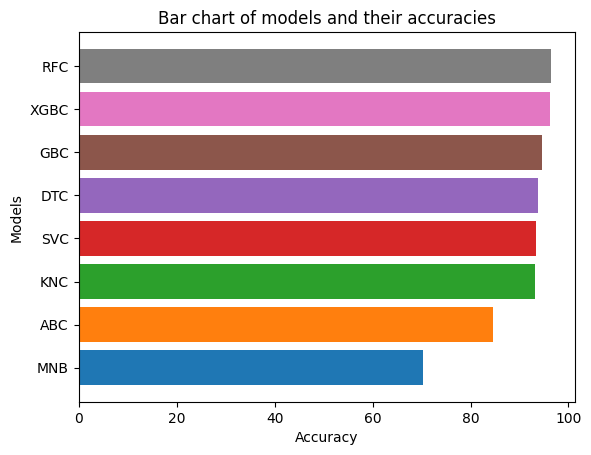

In [602]:
plt.barh([''.join(re.findall(r'[A-Z]+',i)) for i in dict_models.keys()],dict_models.values(),color=plt.cm.tab10(range(len(dict_models.keys()))))
plt.title('Bar chart of models and their accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()

In [603]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
accuracy_score(y_test,y_pred)*100

96.43449419568823

In [604]:
forest.score(x_train,y_train)*100

100.0

pickling

In [605]:
dict1={'model':forest,'output':credit_mix,'Payment_of_Min_Amount':Payment_of_Min_Amount,'scaler':minmax}
with open('credit.pkl','wb') as obj1:
  pickle.dump(dict1,obj1)

In [606]:
y

1        2.0
5        2.0
9        2.0
12       2.0
14       2.0
        ... 
49966    0.0
49976    2.0
49992    0.0
49993    0.0
49997    2.0
Name: Credit_Mix, Length: 12060, dtype: float64

In [607]:
y

1        2.0
5        2.0
9        2.0
12       2.0
14       2.0
        ... 
49966    0.0
49976    2.0
49992    0.0
49993    0.0
49997    2.0
Name: Credit_Mix, Length: 12060, dtype: float64

In [608]:
x

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount
1,3,4,3,4.0,3,9.0,13.27,809.98,274,0
5,2,4,6,1.0,3,3.0,5.42,605.03,328,0
9,1,5,8,3.0,6,3.0,2.10,1303.01,222,0
12,2,5,4,1.0,5,6.0,1.99,632.46,215,0
14,2,5,4,1.0,5,6.0,1.99,632.46,217,0
...,...,...,...,...,...,...,...,...,...,...
49966,6,7,15,4.0,53,16.0,17.13,1453.61,139,1
49976,4,4,3,4.0,11,7.0,1.59,678.57,211,0
49992,10,8,29,5.0,33,25.0,18.31,3571.70,76,1
49993,10,8,29,5.0,33,25.0,18.31,3571.70,77,1


In [609]:
y

1        2.0
5        2.0
9        2.0
12       2.0
14       2.0
        ... 
49966    0.0
49976    2.0
49992    0.0
49993    0.0
49997    2.0
Name: Credit_Mix, Length: 12060, dtype: float64

In [610]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()